# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(len(cities))

612


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']

weather_df= pd.DataFrame(columns = weather)

weather_df['City']= cities

# # Build query URL
url = 'http://api.openweathermap.org/data/2.5/weather?"'

print('Beginning Data Retrieval')
print('------------------------')

counter = 0

for index, row in weather_df.iterrows():
    parameters = {"q":row["City"],"appid":api_key, "units":"imperial"}
    result = requests.get(url,params=parameters).json()
    counter+=1
    if result['cod'] == '404':
        print('City not found. Skipping...')
    else: 
        weather_df.set_value(index, 'Max Temp', result['main']['temp_max'])
        weather_df.set_value(index, 'Cloudiness', result['clouds']['all'])
        weather_df.set_value(index, 'Humidity', result['main']['humidity'])
        weather_df.set_value(index, 'Wind Speed', result['wind']['speed'])
        weather_df.set_value(index, 'Country', result['sys']['country'])
        weather_df.set_value(index, 'Lat', result['coord']['lat'])
        weather_df.set_value(index, 'Lng', result['coord']['lon'])
        weather_df.set_value(index, 'Date', result['dt'])
        print(f'Processing Record ' + str(counter) + ' of Set ' + str(len(cities)) + ' | ' +  row['City'])
        
print('------------------------')
print('Date Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 612 | rikitea


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

Processing Record 2 of Set 612 | saint-philippe
Processing Record 3 of Set 612 | busselton
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 612 | kaitangata
Processing Record 7 of Set 612 | qaanaaq
Processing Record 8 of Set 612 | hobart
Processing Record 9 of Set 612 | qianan
Processing Record 10 of Set 612 | vila
Processing Record 11 of Set 612 | fortuna
Processing Record 12 of Set 612 | punta arenas
Processing Record 13 of Set 612 | albany
Processing Record 14 of Set 612 | sao filipe
Processing Record 15 of Set 612 | vaini
Processing Record 16 of Set 612 | port lincoln
Processing Record 17 of Set 612 | kapaa
Processing Record 18 of Set 612 | kaeo
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 612 | sumbe
Processing Record 22 of Set 612 | havelock
Processing Record 23 of Set 612 | hermanus
Processing Record 24 of Set 612 | atuona
Processing Record 25 of Set 612 | kahului
Processing Record 26 of Set 612 | chiang kl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df.to_csv("city_data.csv")

In [5]:
city_data = 'city_data.csv'
city_data_df = pd.read_csv(city_data)

In [6]:
city_data_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,rikitea,0.0,PF,1.554418e+09,100.0,-23.12,-134.97,76.58,16.46
1,1,saint-philippe,1.0,CA,1.554418e+09,27.0,45.36,-73.48,35.60,16.11
2,2,busselton,0.0,AU,1.554418e+09,61.0,-33.64,115.35,46.99,9.08
3,3,maarianhamina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,artyk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
### Plotting the Data
# * Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# * Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

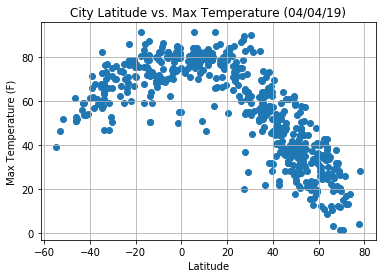

In [22]:
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker ="o")
plt.title('City Latitude vs. Max Temperature (04/04/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('../Images/Lat vs. Temp.png')

In [23]:
plt.show()

#### Latitude vs. Humidity Plot

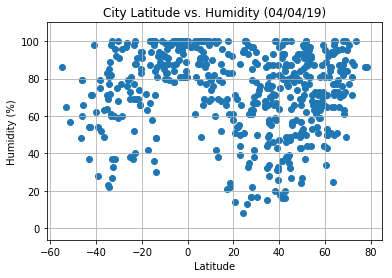

In [35]:
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker ="o")
plt.title('City Latitude vs. Humidity (04/04/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(top = 110)
plt.grid()
plt.savefig('../Images/Lat vs. Humidity.png')

In [25]:
plt.show()

#### Latitude vs. Cloudiness Plot

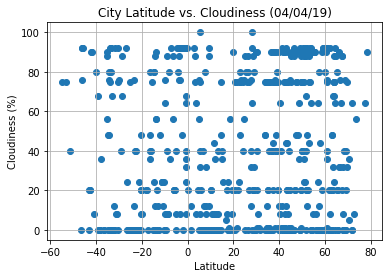

In [26]:
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker ="o")
plt.title('City Latitude vs. Cloudiness (04/04/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('../Images/Lat vs. Cloudiness.png')

In [27]:
plt.show()

#### Latitude vs. Wind Speed Plot

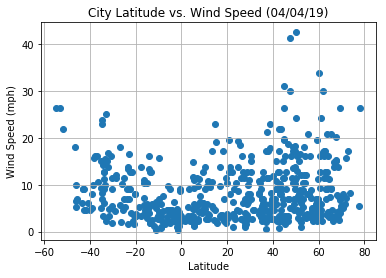

In [28]:
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker ="o")
plt.title('City Latitude vs. Wind Speed (04/04/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('../Images/Lat vs. Wind Speed.png')

In [18]:
plt.show()

Observable Trends:
* The max temperature increases as you approach the equator.
* Cities at the equator are more likely to have increased levels of humidity.
* There is no apparent relationship between cloudiness and latitutde. 
* Cities at the equator have decreased wind speed. 